# 자연어 처리 기본 배경이론 (1950s ~)

- 백터 공간 모델
  - 각 문서(문장, 코퍼스)는 백터 공간에 하나의 백터로 표현된다. 하나의 백터와 또 다른 백터가 근거리에(가까운위치에) 존재하면 2개의 의미는 유사하다
- 통계적 의미론 가설(이하 4개 이론이 배경)
  - Bag of Words 
    - 문서의 단어 빈도는 질의에 대한 문서의 관령성을 나타내는 경향이 있다
  - 분포가설
    - 비슷한 맥락에서 발생하는 단어는 유사한의 의미를 가진다
  - 확장된 분포가설
    - 유사한 쌍으로 발생하는 패턴은 유사한 의미를 가진다
  - 잠재 관계 가설
    - 비슷한 패턴으로 동시에 등장하는 단어의 쌍은 유사한 의미를 가진다


# 단어 임베딩 추가내용

## 유사도

- 백터 공간에서 거리가 가까운 백터는 서로 의미가 유사하다
- 이런 값은 코사인유사도(cosine similarity)로 구한다

In [0]:
import torch

In [0]:
x1 = torch.FloatTensor( [1,2,3,4] )
x2 = torch.FloatTensor( [1,4,2,1] )

In [0]:
# 두 백터 사이의 유사도
torch.cosine_similarity( x1, x2, dim=0 )
# 문장의 뉘앙스가 어느쪽에 더 가깝다와 같은 의미론적인 해석이 더 가능해진다

tensor(0.7396)

- 코사인 유사도는 백터가 촘촘한 형태인 경우에 성능이 잘 발현된다. 밀집백터이여야 한다 
- Bag of Words기법으로 **원-핫 인코딩**으로 사용할수 있다 단어의 표현을
  - 총 단어의 수대로 백터를 만들고
  - 해당하는 단어의 인덱스만 1 나머지는 0
  - 원-핫 인코딩으로 표현되었다( 0 or 1 표현), 이런 백터가 2개 있다고 치고 코사인 유사도를 측정하면 항상 0이 된다

In [0]:
x3 = torch.FloatTensor( [0,1,0,0] )
x4 = torch.FloatTensor( [1,0,0,0] )
torch.cosine_similarity( x3, x4, dim=0 )
# 원-핫 인코딩 데이터로 코사인 유사도 측정도 => 0

tensor(0.)

- 이런 문제 때문에, 0 과 1이 아닌 실수 차원으로 단어를 표현하는 것을 임베딩(embeding)이라고 한다

In [0]:
# 별도의 형태소 분석이 없이 공백 기반으로 토큰 분리
tokens  = 'We are going to study HanGaram IT school'.split() # 원문, 사전
new_txt = 'We are HanGaram'.split() # 새로운 문장
tokens, new_txt

(['We', 'are', 'going', 'to', 'study', 'HanGaram', 'IT', 'school'],
 ['We', 'are', 'HanGaram'])

In [0]:
# 단어장 구성 { 'We':0(인덱스값), .. }
# 단순하게 표현
vocab = { token:index for index,token in enumerate( tokens ) }
vocab, len(vocab)

({'HanGaram': 5,
  'IT': 6,
  'We': 0,
  'are': 1,
  'going': 2,
  'school': 7,
  'study': 4,
  'to': 3},
 8)

In [0]:
# 사전의 개수가 8개, 임베딩으로 표현하는것이 3개(설정)라고 한다면 
# 임베딩된 행렬은 8x3, 임의로 값을 부여하여서 구성
# 사전을 임베딩하여 행렬로 표현한것
embedding = torch.FloatTensor([ [1,5,7],
                                [2,1,8],
                                [1,4,5],
                                [4,1,1],
                                [1,8,9],
                                [6,1,10],
                                [3,2,2],
                                [1,5,4]
                               ] )
embedding

tensor([[ 1.,  5.,  7.],
        [ 2.,  1.,  8.],
        [ 1.,  4.,  5.],
        [ 4.,  1.,  1.],
        [ 1.,  8.,  9.],
        [ 6.,  1., 10.],
        [ 3.,  2.,  2.],
        [ 1.,  5.,  4.]])

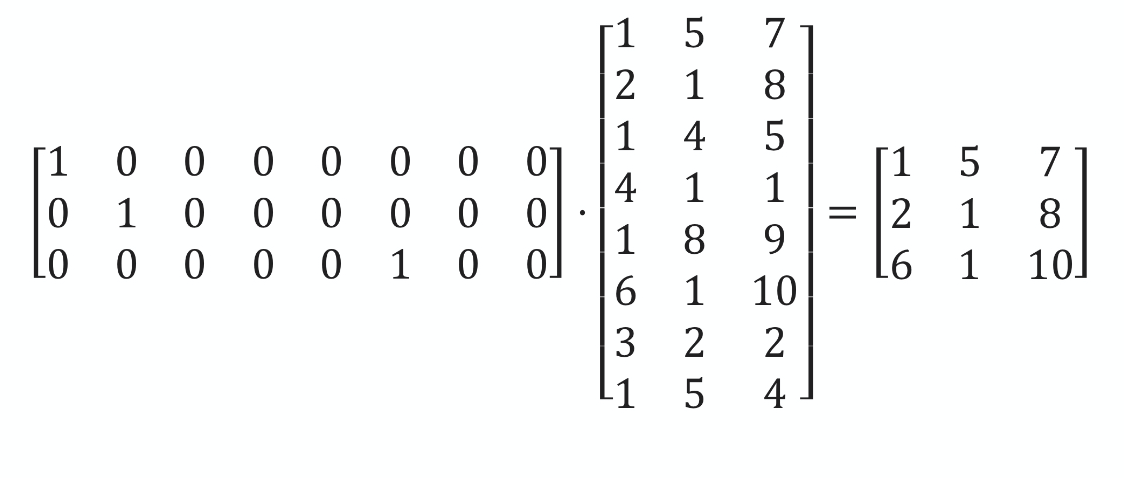

In [0]:
from IPython.display import Image
Image( '/content/조회한다_원한인코딩단어와임베딩행렬과행렬간의곱셈.png', width=400 )
# 문장이 원핫인코딩으로 표현되어 있다면, 이를 임베딩된 사전과 행렬의 곱을 수행하면, 
# 문장 데이터로 인베딩되 데이터로 표현이 되어, 자연어 처리에 기본이 되는 코사인유사도 측정에 
# 문제가 없게 된다

In [0]:
# new_txt를 처리
indexs = torch.LongTensor( [ vocab[token] for token in new_txt ] )
embedding[ indexs, : ]

tensor([[ 1.,  5.,  7.],
        [ 2.,  1.,  8.],
        [ 6.,  1., 10.]])

In [0]:
new_txt

['We', 'are', 'HanGaram']

- 임베딩간에 행렬의 곱을 사용하므로 => 신경망에서 W(가중치, 매개변수)를 최적화할때 사용하는 역전파 방법이 가능하다

In [0]:
# 파이토치로 처리
import torch.nn as nn
em_layer = nn.Embedding( num_embeddings = len(vocab),
              embedding_dim  = 3,
              _weight        = embedding )

In [0]:
em_layer( indexs )

tensor([[ 1.,  5.,  7.],
        [ 2.,  1.,  8.],
        [ 6.,  1., 10.]], grad_fn=<EmbeddingBackward>)

## Word2Vec

In [0]:
'''
!pip install konlpy

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install


# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install
'''

     |████████████████████████████████| 19.4MB 232kB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 2.3MB 47.6MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
     |████████████████████████████████| 92kB 2.4MB/s 
  Created wheel for JPype1-py3: filename=JPype1_py3-0.5.5.4-cp36-cp36m-linux_x86_64.whl size=2696307 sha256=f78935af49039f622b895725761221034bbfb50cf23f967263a041a4f30e7f6e
  Stored in directory: /root/.cache/pip/wheels/52/37/1f/1015d908d12a0e9b239543d031fda0cded9823aa1306939541
Successfully built JPype1-py3
Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ I

In [0]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 216kB/s 
     |████████████████████████████████| 92kB 8.8MB/s 
     |████████████████████████████████| 2.3MB 22.4MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

     |████████████████████████████████| 92kB 2.5MB/s 
  Created wheel for JPype1-py3: filename=JPype1_py3-0.5.5.4-cp36-cp36m-linux_x86_64.whl size=2680609 sha256=7255081a1c69a9e707872f03ec745e8c904f5dbd1a0ae057a2c96144bd489c35
  Stored in directory: /root/.cache/pip/wheels/52/37/1f/1015d908d12a0e9b239543d031fda0cded9823aa1306939541
Successfully built JPype1-py3


In [0]:
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [817 kB]
Get:13 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [83.1 kB]
Get:14 http:

In [0]:
import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1380k  100 1380k    0     0   487k      0  0:00:02  0:00:02 --:--:--  770k
mecab-0.996-ko-0.9.1/
mecab-0.996-ko-0.9.1/config.h.in
mecab-0.996-ko-0.9.1/Makefile.train
mecab-0.996-ko-0.9.1/ChangeLog
mecab-0.996-ko-0.9.1/configure
mecab-0.996-ko-0.9.1/swig/
mecab-0.996-ko-0.9.1/swig/version.h.in
mecab-0.996-ko-0.9.1/swig/Makefile
mecab-0.996-ko-0.9.1/swig/version.h
mecab-0.996-ko-0.9.1/swig/MeCab.i
mecab-0.996-ko-0.9.1/mkinstalldirs
mecab-0.996-ko-0.9.1/mecab-config.in
mecab-0.996-ko-0.9.1/configure.in
mecab-0.996-ko-0.9.1/mecab.iss.in
mecab-0.996-ko-0.9.1/aclocal.m4
mecab-0.996-ko-0.9.1/mecabrc.in
mecab-0.996-ko-0.9.1/INSTALL
mecab-0.996-ko-0.9.1/AUTHORS
mecab-0.996-ko-0.9.1/example/
mecab-0.996-ko-0.9.1/example/example_lattice.c
mecab-0.996-ko-0.9.1/

In [0]:
import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 46.3M  100 46.3M    0     0  8226k      0  0:00:05  0:00:05 --:--:-- 11.5M
mecab-ko-dic-2.0.1-20150920/
mecab-ko-dic-2.0.1-20150920/configure.ac
mecab-ko-dic-2.0.1-20150920/Person-actor.csv
mecab-ko-dic-2.0.1-20150920/IC.csv
mecab-ko-dic-2.0.1-20150920/model.def
mecab-ko-dic-2.0.1-20150920/user-dic/
mecab-ko-dic-2.0.1-20150920/user-dic/place.csv
mecab-ko-dic-2.0.1-20150920/user-dic/README.md
mecab-ko-dic-2.0.1-20150920/user-dic/person.csv
mecab-ko-dic-2.0.1-20150920/user-dic/nnp.csv
mecab-ko-dic-2.0.1-20150920/Place.csv
mecab-ko-dic-2.0.1-20150920/rewrite.def
mecab-ko-dic-2.0.1-20150920/tools/
mecab-ko-dic-2.0.1-20150920/tools/add-userdic.sh
mecab-ko-dic-2.0.1-20150920/tools/mecab-bestn.sh
mecab-ko-dic-2.0.1-20150920/tools/convert_for_using_store.sh

In [0]:
# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install

Cloning into 'mecab-python-0.996'...
remote: Counting objects: 17, done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 3), reused 0 (delta 0)
Unpacking objects: 100% (17/17), done.
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
copying MeCab.py -> build/lib.linux-x86_64-3.6
running build_ext
building '_MeCab' extension
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/include -I/usr/include/python3.6m -c MeCab_wrap.cxx -o build/temp.linux-x86_64-3.6/MeCab_wrap.o
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.6/MeCab_wrap.o -L/usr/local/lib -lmecab -lstdc

- Word2Vec
  - 중심 단어를 기준으로 주변 단어를 예측 => Skip-Gram:1
  - 주변 단어를 기준으로 중심 단어를 예측 => CBoW:0
- gensim
  - 이미 훈련된 임베딩 백터를 초기화하여 전이 학습처럼 활용할 수 있다 
  - 학습이 수행된 모델을 로드해서 => 그 지점부터 다시 학습이 이어지는 => 모델의 업그레이드 수행

In [0]:
# word2Vec
from konlpy.tag import Mecab
mecab = Mecab()

In [0]:
! pip install gensim

In [0]:
from gensim.models.word2vec import Word2Vec

# tokenizer 함수 => 텍스트(하나의 문장을)를 형태소 분해해서, 태그를 붙여서 리턴
tokenizer = lambda x:[ '%s/%s' % (token.lower(),tag.lower())  
                       for token, tag in mecab.pos(x) ]
'''
def tokenizer( sentence ):
  # [('오늘', 'MAG'),...]
  tmp  = []
  for token, tag in mecab.pos(sentence):
    # '오늘/MAG'
    #'%s/%s' % (token.lower(),tag.lower())
    tmp.append( '/'.join( (token.lower(),tag.lower()) ) )
  return tmp
'''  

# raings.txt 파일로드
with open('/content/ratings.txt') as f:
  # 줄단위로 나눠서 처리
  raw_data = f.read().splitlines()[1:]
  # raw_data => [ 'ID\t내용\t1', '',... ]  
  data     = [ line.split('\t')[1]  for line in raw_data]
  # data     => [ [내용 ], '',... ]
  # 토큰화
  data     = [ tokenizer(sentence) for sentence in data ]
  # data     => [ ['토큰/tag','토큰/tag','형태소',' ], '',... ]


In [0]:
len( data )

200000

In [0]:
print( data[0] )

['어릴/va+etm', '때/nng', '보/vv', '고/ec', '지금/mag', '다시/mag', '봐도/vv+ec', '재밌/va', '어요/ef', 'ㅋㅋ/unknown']


- 2003년 NNLM(Nenural Network Language Model)에서 이전 단어 정보로 다음 단어를 예측하는 딥러닝 모델을 제시
- We are going ____ <= to를 예측이 되게 임베딩행렬 C를 학습하고 강화하는것을 목적

In [0]:
# data 200000 => [ [ '형태소/태그',.. ], ... ]
# sentences : 문장 데이터 입력, [ ['토큰화된문장'], .. ]
# size      : 임베딩백터의 크기  ( None, 100)
# window    : 중심 단어로 부터 살필 주변의 단어 크기 => Top 5를 표현
# min_count : 단어의 최소 등장 횟수, 만약 3이라면 3번 이상 등장한 형태소가 대상
# sg        : 1 or 0:
model = Word2Vec( sentences=data, size=100, window=5, min_count=3, sg=1  )
# 중심단어를 기반으로 주변 단어를 예측하는 모델

In [0]:
# 훈련 완료후, 필요없는 메모리 정리
model.init_sims( replace=True )

In [0]:
# 단어 임베딩 행렬 크기
model.wv.vectors.shape

(30311, 100)

In [0]:
# 모델 덤프(저장) => 다음번 작업시 로드하여 이어서 학습을 추가할수 있다
model.wv.save_word2vec_format('./w2v.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import os
print( os.listdir() )

['MeCab_wrap.cxx', '.git', 'README', 'README.md', 'bindings.html', 'test.py', 'GPL', 'MeCab.py', '__pycache__', 'setup.py', 'AUTHORS', 'w2v.model', 'LGPL', 'build', 'COPYING', 'BSD']


### 유사도 확인

In [0]:
# 데이터는 모델학습시 사용했던 형태 
# [ ['형태소/태그',..] ]
model.wv.similarity( *tokenizer( '여배우 배우' ) )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.79059726

In [0]:
# 배우라는 텍스트는 여배우를 지칭하는쪽으로 더 많이 사용되었다
# 배우라는 텍스를 사용할때 여배우를 의미하는 쪽으로 더 많이 사용되었기 때문에 유사도가 더 높다
model.wv.similarity( *tokenizer( '남배우 배우' ) )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6397803

In [0]:
# 중심단어 스토리의 주변단어 5개를 유사도 순으로 표현
model.wv.most_similar( *tokenizer( '스토리' ), topn=5 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('전개/nng', 0.8501452207565308),
 ('줄거리/nng', 0.8013200759887695),
 ('시나리오/nng', 0.7944730520248413),
 ('내용/nng', 0.794208288192749),
 ('구성/nng', 0.768761396408081)]

In [0]:
# 남자배우 - 남자 => 여자 : 백터연산 처리시 => 어떤 단어가 나오는가?
# 남자배우라는 단어에서 남자를 빼면 => 성별에 대한 부분이 제거되고 배우가 남게되어
# 배우에 대한 유사도언어가 나오면 된다!!
# 임베딩 백터가 단어의 의미를 포현하고 있다
model.wv.most_similar( positive=tokenizer( '남자배우' ), 
                       negative=tokenizer( '남자' ),
                       topn=5
                      )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('여배우/nng', 0.7905973196029663),
 ('연기자/nng', 0.7880814075469971),
 ('조연/nng', 0.745646595954895),
 ('신인/nng', 0.7308073043823242),
 ('연기파/nng', 0.7295475006103516)]

In [0]:
model.wv.most_similar( *tokenizer( '배우' ), topn=5 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('여배우/nng', 0.7905973196029663),
 ('연기자/nng', 0.7880814075469971),
 ('조연/nng', 0.745646595954895),
 ('신인/nng', 0.7308072447776794),
 ('연기파/nng', 0.7295475006103516)]

## 사전훈련 데이터의 임베딩 백터
- 이미학습이 수행된 임베딩 백터를 사용해서 모델의 성능을 더욱 더 향상시킬수 있다

In [0]:
from torchtext.data import Field
from konlpy.tag import Mecab

In [0]:
# 형태소 분석기
mecab = Mecab()
# 데이터를 훈련시 형태와 동일하게 구성
tokenizer = lambda x:[ '%s/%s' % (token.lower(),tag.lower())  for token, tag in mecab.pos(x) ]

In [0]:
# ratings.txt 대비한 필드 정의
TEXT  = Field( sequential = True, # 시퀀스 데이터 맞다
               use_vocab  = True, # 사전을 사용하겟다
               tokenize   = mecab.morphs, # 행태소 분석기로 이 함수를 사용하겟다
               lower      = True, # 소문자로 처리하겟다
               batch_first= True  # 배치사이즈는 앞으로 위치  
)
LABEL = Field( sequential = False, # 0 or 1
               use_vocab  = False, # 사전 사용 안함
               batch_first= True,
               preprocessing = lambda x: int(x), # 정수 처리
               is_target  = True   # 타겟 데이터 맞음 => y    
)
ID    = Field( sequential = False,
               use_vocab  = False,
               is_target  = False
              )

In [0]:
from torchtext.data import TabularDataset
dataset = TabularDataset( path='/content/ratings.txt', # 데이터 파일의 위치, 경로
                          format='tsv',       # tab으로 분리되어 있다 tsv, csv, json등이 가능
                          fields=[('id',ID),('text',TEXT),('label',LABEL)], # (필드를호출할 닉네임,필드)
                          skip_header=True    # 데이터의 첫줄은 생략
                         )

In [0]:
# 훈련된 임베딩 행렬을 사용하기위해 백터 객체를 생성하여 사전 빌드시 전달
from torchtext.vocab import Vectors
# 저장한 모델(임베딩행렬)을 로드하여 백터에 담는다
vectors = Vectors( name='w2v.model' )

 95%|█████████▍| 28692/30311 [00:01<00:00, 19327.78it/s]


In [0]:
# 백터를 단어장 생성시 연결
TEXT.build_vocab( dataset, min_freq=3, vectors=vectors )
# 단어장에서 빈도 3이상 나오는 단어만 가지고 처리되었다
TEXT.vocab.vectors.size()
# (30311, 100)

torch.Size([26234, 100])

In [0]:
# 표현 임베딩층 
# 사전에 훈련디ㅗㄴ 데이터를 사용하여서 임베딩층을 생성
# freeze:False 가 되야 추가적인 학습이 가능하게 된다(중요)
embedding = nn.Embedding.from_pretrained( TEXT.vocab.vectors, freeze=False )

# 순환 신경망

## RNN

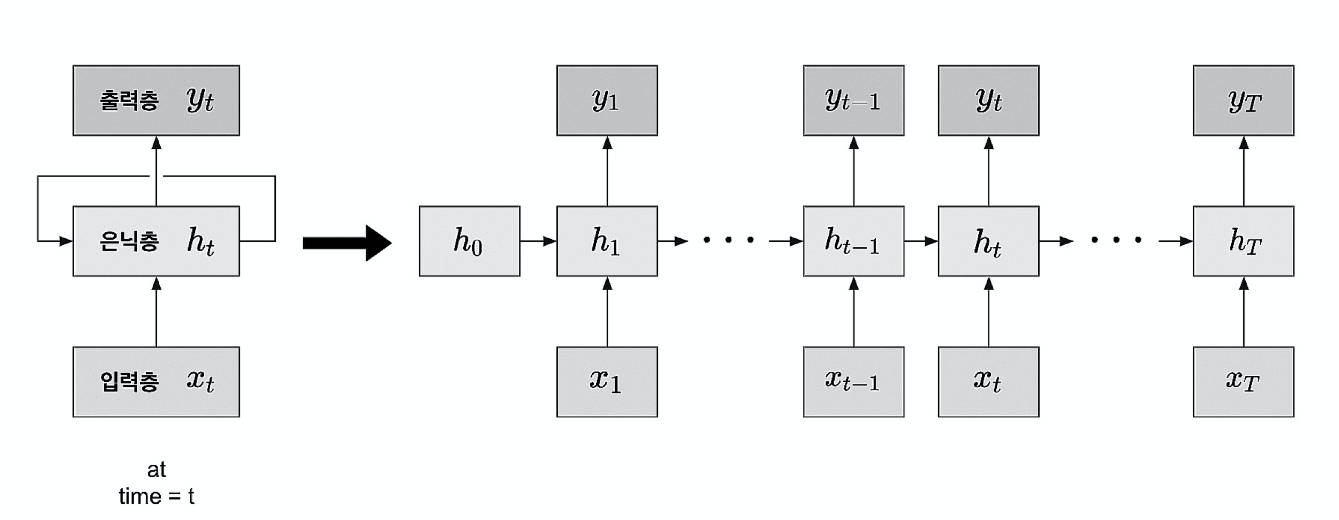

In [0]:
Image( '/content/RNN구조.png', width=400 )

## 순환 신경망 설계 방식에 따른 장점

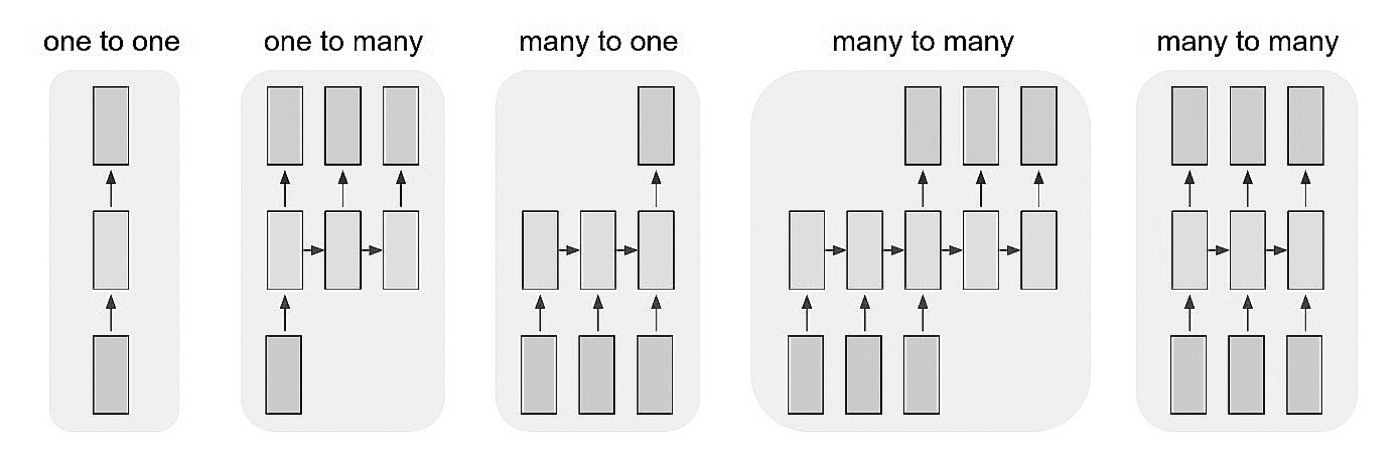

In [0]:
Image( '/content/순환신경망의장점.png', width=400 )
# 프로젝트 용도에 따라 순환신경망을 각각 달라지고, 이에따른 
# 출력값(Yt), 현재정보(Ht)등의 정보가 진행하는 방향이 달라질수 있다
# 위의 그림은 다-대-다의 형태를 취한다

- one-to-one
  - 타임 스텝이 1, 일반적인 순방향 신경망와 동일한 구조를 가진다
- one-to-many
  - 하나의 입력, 여러개의 출력 =>Image Captioning : 이미지를 설명하는 문장을 생성한다
- many-to-one
  - 여러개의 입력을 받고,하나의 출력을 생성 => 감정분류(Sentiment Classfication)
- many-to-many
  - case 1
    - 여러개의 입력을 받고, 마지막 은닉층에서 모든 정보를 모아서 여러개의 출력을 생성 : 기계 번역
  - case 2 
    - 여러개의 입력을 받고, 동시에 여러개의 출력을 생성 : 영상의 여러 프레임을 입력으로 받아서 어떤 내용인지 분류하는 분야

- FeedForword Neural Network
- 다루는 데이터는 : 시퀀스 데이터이다
  - 주식, 문장, 센서데이터등 순서를 가진 연속적인 데이터이다
  - 순서를 가졌다 => 시간을 가졌다 => 이런 시간을 전달하면서 모델링을 할수 있는 신경망 구조를 순환 신경망, RNN이다
- 용어정리
  - 시간 : t => time-step (타임스텝)
  - 이전시간 : t - 1
  - 다음시간 : t + 1
  - 순환 신경망은 이전 타임 스텝의 정보를 현재 타임 스템의 입력으로 받는다 
    - 순서 정보(시간정보)를 전달받을수 있다(연속성이 생긴다) => 시계열 데이터의 특성
- 활성화 함수
  - 순환 신경망은 주로 tanh를 사용한다
- hh
  - h: Hidden layer
  - hh : Hidden layer->Hidden layer
    - 이전 은닉층 -> 다음 은닉층으로 가는 매개변수값(선형결합의 가중치)과 편향값, hh를 붙여서 표현
- xh
  - x: Input layer
  - xh : Input layer->Hidden layer 
    - 입력층 -> 다음 은닉층으로 가는 매개변수값(선형결합의 가중치)과 편향값, xh를 붙여서 표현  

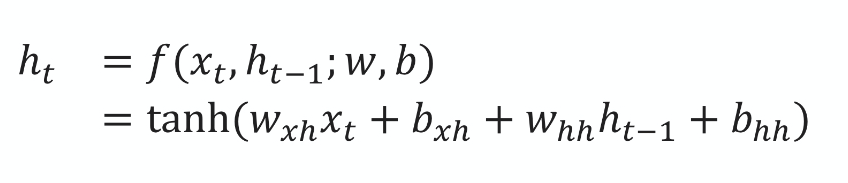

In [0]:
Image('/content/순환신경망순방향전파.png', width=500)

- 원리
  - 1. 입력 : 현재 타임스텝(t)의 입력정보 Xt, 이전 타입스템(t-1)의 정보(Ht-1), 데이터의 시작점에서는 t-1이 없기 때문에 통상 0으로 처리하기도 한다
  - 2. 활성화 : 활성화함수는 tanh를 주로 사용, => 활성화함수를 통과한다 (비선형으로 만든다) , 활성화 함수를 들어오는 재료는 선형(행렬의 곱) => 활성호 함수를 통과하면 Ht가 도출 => 출력값으로 이동
  - 3. 다음단계 : 출력값(Yt)는 다음 타임 스템(t+1)의 입력으로 이동

### RNN  Cell => 은닉층을 구현한 모듈
- 입력 (Xt, Ht-1) 를 받고, 현재 타임 스텝의 출력값 Ht를 도출하는 과정
- 이렇게 총 길이 => T(총시간)만큼 타임 스템을 순반향으로 전파하여 학습이 진행

In [0]:
# 1. 모듈 가져오기
# deep learning 엔진
import torch

# 전처리 모듈
from torchtext.data import Field
from torchtext.data import TabularDataset
from torchtext.data import Iterator
from konlpy.tag import Mecab

# rnn 신경망 구축관련 모듈
import torch.nn as nn

# train 관련 모듈
import torch.optim as optim # 경사하강법

In [0]:
# 동일한 실험 환경 구성 => 최적화 포인트(요인) 확인하기 위해
torch.manual_seed( 1004 )

In [0]:
###################################
# 1부 데이터 전처리-> Field
# 맴버 호출  => 객체명.맴버
# 클레스 안에서 자기 자신 객체 => self or this(타언어, java~)
# initXXX() <-> freeXXX()
# createXXX() <-> destoryXXX()
class MySentenceField():
  # 맴버변수 정의
  TEXT = None
  '''
    torchtext의 데이터 전처리 절차를 수행하는 클레스 
    - 데이터 정의 
    - 데이터셋 구성
    - 사전(단어장) 생성
    - 데이터로더 생성
  '''
  def __init__(self, src, foramt, batch_size):    
    # 연산 디바이스 획득
    #device = 참일때값  if 조건(현재 토치에서 cuda를 사용할수 있는가?) else 거짓일때값
    self.device = 'cuda'  if torch.cuda.is_available() else 'cpu'    
    # 데이터 초기화
    self.initField()
    # 데이터셋 구성
    self.initData(src, foramt)
    # 사전(단어장) 생성
    self.createVoca()
    # 데이터로더 생성
    self.initLoader(batch_size)
    pass
  def initField(self):
    # Field의 정의 개수는 데이터의 컬럼수에 맞춰서 정의(현재는 1개라서 1개만 정의)
    # 지역 변수로 형태소 분석기 생성 -> Field내부에서 분절 처리가 가능하게 연결
    self.mecab = Mecab()
    # Field => myData.txt의 데이터중 contents 파트(컬럼)의 내용을 담당하는 객체
    # Field를 생성하는 맴버 변수를 구성한다
    # 원 데이터의 형태를 보고 필드의 수와 성분을 결정한다
    self.TEXT = Field( sequential = True, # 시퀀스 데이터 맞다
                       use_vocab  = True, # 사전을 사용하겟다
                       tokenize   = mecab.morphs, # 행태소 분석기로 이 함수를 사용하겟다
                       lower      = True, # 소문자로 처리하겟다
                       batch_first= True  # 배치사이즈는 앞으로 위치  
    )
    pass
  def initData(self, src, foramt):
    # TabularDataset을 만드는데, 원 데이터를 주입
    self.dataset = TabularDataset( path=src,                  # 데이터 파일의 위치, 경로
                              format=foramt,                   # tab으로 분리되어 있다 tsv, csv, json등이 가능
                              fields=[('text',self.TEXT)],    # (필드를호출할 닉네임,필드)
                              skip_header=True                # 데이터의 첫줄은 생략
                            )
    pass
  def createVoca(self):
    # 사전 구성  
    self.TEXT.build_vocab( self.dataset )
    pass
  def initLoader(self, batch_size):    
    self.dataLoader = Iterator(  dataset    = self.dataset,
                                 batch_size = batch_size,       # 설정값, 배치크기
                                 device     = self.device   # gpu or cpu    
                              )
    pass
  def test(self):
    # 데이터 확인
    # 사전의 개수
    print( '사전의 토큰 개수', len( self.TEXT.vocab ) )
    print( '특정 토큰의 문자열을 넣으면 인덱스값 획득(인코딩)', self.TEXT.vocab.stoi['축구'] )
    # 사전의 토큰을 나열해서 확인
    # 인덱스 => 사전에서 => 토큰획득
    for idx in range( len( self.TEXT.vocab ) ):
      # 인덱스 => 토큰(형태소) : 디코딩
      print( idx, self.TEXT.vocab.itos[ idx ] )

  # encode 함수를 구현하시오
  # 입력으로 문자열=> 리턴값이 사전으로 매칭하여서 리스트로 리턴 => 2차원 텐서로 리턴(업그레드)
  def encode(self, src ):
    #if self.TEXT and self.mecab:
    return self.TEXT.process( [ self.mecab.morphs( src ) ] ).to( self.device )
    #return []
  
  def decode(self, src):
    return ' '.join([ self.TEXT.vocab.itos[ idx ] for idx in src ])

  def splitTrainTarget(self, src):
    # 인코딩
    oriData = self.encode(src)
    # 대상 데이터 획득 및 리스트 변환후 데이터 처리
    # 텐서에서 직접 조작하여 처리 가능(해보세요)
    x_raw   = oriData.squeeze().tolist()[:-1]
    t_raw   = oriData.squeeze().tolist()[1:]
    x       = torch.LongTensor( x_raw ).unsqueeze(0)
    t       = torch.LongTensor( t_raw ).unsqueeze(0)
    return x, t

  

In [0]:
# 데이터 전처리 객체 생성
mySentData = MySentenceField( src='/content/myData.txt', foramt='tsv', batch_size=3 )

In [0]:
mySentData.encode('영국 축구 리그로 돌아가고 싶어')

tensor([[8, 9, 5, 4, 3, 2, 6, 7]])

In [0]:
mySentData.encode('영국 축구 리그로 돌아가고 싶어').size()

torch.Size([1, 8])

In [0]:
# 테스트
mySentData.test()

사전의 토큰 개수 10
특정 토큰의 문자열을 넣으면 인덱스값 획득(인코딩) 9
0 <unk>
1 <pad>
2 고
3 돌아가
4 로
5 리그
6 싶
7 어
8 영국
9 축구


In [0]:
mecab = Mecab()
[ mecab.morphs( '영국 축구 리그로 돌아가고 싶어' ) ]

[['영국', '축구', '리그', '로', '돌아가', '고', '싶', '어']]

In [0]:
# 순환 신경망 구성 클레스 
# 1. nn.Module  상속
class MyRNN(nn.Module):
  # 2. 생성자 구현
  def __init__(self, vocab_size, input_size, hidden_size, batch_first=True):
    # 2-1. 생성자 첫번째 코드는 부모 생성자 호출
    super( MyRNN, self ).__init__()
    # 2-2. 레이어 생성
    # 임베딩층 : 인덱스화한 데이터가 임베딩층에 입력(입력부분) => 단어 임베딩(사전크기,입력크기)
    self.embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=input_size)
    # RNN or LSTM or GRU등 레이어층 생성 (XXX Cell)
    # (임베딩층의 입력 차원, 은닉층의 크기, ..) (임베딩크기,은닉층크기,배치위치)
    self.rnn_layer       = nn.RNN( input_size, hidden_size, batch_first=batch_first )
    # 선형층 (은닉층, 사전)
    self.linear          = nn.Linear( hidden_size, vocab_size)
    pass
  # 3. 신경망 구성(레이어 연결)
  # 외부에서 model(x) 이렇게 호출하면 forward(x)가 작동한다 : 순방향 전파
  def forward(self, x):
    '''
      텐서 크기 변화를 표시하기 위해 기호 정의
      - V:단어장(사전)의 크기, 등록된 형태소의 총개수
      - T:시퀀스의 총 길이(총 시간)
      - B:(미니)배치 크기
      - E:임베딩 크기 == RNN 입력층의 크기
      - D or H:RNN의 은닉층의 크기
    '''
    # 1. 데이터가 emdedding 층을 통과해서 분산 방식으로 단어를 표현 <- 단어 임베딩
    # x      => (1,7)    <= 예시
    print( 'x => ',      x.size() )
    output = self.embedding_layer( x )
    print( 'output1 => ', output.size() )
    # output => (1,7,5)
    # ----------------------------------------------------------------------------

    # 2. RNN 층 => RNN Cell 구성 => 출력 2개 : 출력, 은닉층 
    # output => (1,7,5)
    output, hidden = self.rnn_layer(output)
    # 10의 근거는 hidden_size = 10 이라고 했기 때문에
    # output => (1,7,10) => (B,7,10) : 1차원이 batch_size만큼 적용된다, 현재는 1
    print( 'output2 => ', output.size() )
    # hidden => (1,7,10)
    print( 'hidden => ',  hidden.size() )

    # 3. 최종 출력층 
    # output => (1,7,10) => (B,7,10) => (B,7,D or H) 
    output = self.linear( output )
    # output => (1, 7, 10) => (B, 7, V)

    # 4. 리턴 : 출력값
    # output.size(2) => 10 => V
    # -1 => 1*7 => 1*T(문장의 토큰이 나오는 순서 T, 시간관점으로 대비)
    # ( 1*7, V ) => ( 1*7, 10 )
    return output.view( -1, output.size(2))

In [0]:
class MyRNN(nn.Module):
  def __init__(self, vocab_size, input_size, hidden_size, batch_first=True):
    super( MyRNN, self ).__init__()
    self.embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=input_size)
    self.rnn_layer       = nn.RNN( input_size, hidden_size, batch_first=batch_first )
    self.linear          = nn.Linear( hidden_size, vocab_size)
  def forward(self, x):
    output = self.embedding_layer( x )
    output, hidden = self.rnn_layer(output)
    output = self.linear( output )
    return output.view( -1, output.size(2))

In [0]:
# 임계값, 실험치, 설정값
vocab_size  = len( mySentData.TEXT.vocab )  # 단어장(사전)의 크기(사전에 등록된 형태소의 총개수)
input_size  = 5                             # 임베딩된 단어의 표현을 5D로 하겠다, 설정
hidden_size = 10                            # 은닉층의 크기, 설정 
batch_first = True                          # (1,28,28) or (28,28,1)

# 순환 신경망 모델 생성
model = MyRNN(vocab_size, input_size, hidden_size, batch_first)

### 학습을 위한 데이터 준비
- /content/myData.txt : 사전을 구축하기 위한 데이터
- 학습용 데이터 : 
  - "영국 축구 리그로 돌아가고 싶어" 사용
  - 타겟 데이터
    (영국, 축구), (축구, 리그), (리그, 로),...
    임의로 문자을 만들기 위해서 형태소 다음 형태소를 타겟으로 잡겟다


In [0]:
############################################################
# 3부 : 학습, 평가, 예측, 결과물(시스템통합)
# 크로스엔트로피, 경사하강법(최적화), 역전파를 통한 최적화, 학습, 평가, 예측

In [0]:
# 학습용 데이터( 피쳐데이터, 타겟데이터(레이블) 준비 )
oriData = mySentData.encode('영국 축구 리그로 돌아가고 싶어')
oriData.dtype, type(oriData), oriData.size(), oriData.squeeze()

(torch.int64,
 torch.Tensor,
 torch.Size([1, 8]),
 tensor([8, 9, 5, 4, 3, 2, 6, 7]))

In [0]:
# 문자열로 복원
for i in oriData.squeeze().tolist():
  print( mySentData.TEXT.vocab.itos[i] )

영국
축구
리그
로
돌아가
고
싶
어


In [0]:
# 대상 데이터 획득
x_raw = oriData.squeeze().tolist()[:-1]
t_raw = oriData.squeeze().tolist()[1:]
x_raw, t_raw

([8, 9, 5, 4, 3, 2, 6], [9, 5, 4, 3, 2, 6, 7])

In [0]:
# 텐서로 조정 => 준비 완료
# 사전값의 텐서 타입은 LongTensor(int64)이다
x = torch.LongTensor( x_raw ).unsqueeze(0)
t = torch.LongTensor( t_raw ).unsqueeze(0)
x, t

(tensor([[8, 9, 5, 4, 3, 2, 6]]), tensor([[9, 5, 4, 3, 2, 6, 7]]))

In [0]:
x,t = mySentData.splitTrainTarget('영국 축구 리그로 돌아가고 싶어')
x, t

(tensor([[8, 9, 5, 4, 3, 2, 6]]), tensor([[9, 5, 4, 3, 2, 6, 7]]))

In [0]:
t.view(-1)

tensor([9, 5, 4, 3, 2, 6, 7])

## 학습시작 

### 반복작업을 통해서 알고리즘이 개선 => 점점 문장이 완성되간다

In [0]:
# sentences history
sentences     = list()

def train():
  # 손실함수 정의
  loss_function = nn.CrossEntropyLoss()
  # 최적화(옵티마이저) 생성
  optimizer     = optim.Adam( params=model.parameters() )  

  for step in range(150+1):# step : 0 ~150
    # 경사하강법 초기화
    optimizer.zero_grad()
    # 순방향 전파 
    output = model( x )
    # 손실값 계산
    loss   = loss_function( output, t.view(-1) )
    # 역방향 전파 -> 출력 -> 입력가지 거꾸로 전파되면서 입력에 도착할수있게
    # 매개변수를 조정하는 과정
    loss.backward()
    # 매개변수 업데이트
    optimizer.step()
    # 로그 출력
    if step % 10 == 0:# 0, 10, 20, .. 150 
      print('-'*30)
      print('%s번 로그 출력' %  (step+1) )
      print('output shape',     output.size())
      print('t.view(-1) shape', t.view(-1).size())
      print('손실값 : %s',      loss)
      # output을 뭔가 처리해서 => [ 2,3,1,3,... ]
      print( output )
      # softmax(-1) => 값을 활성화 함수를 통과 처리
      print( output.softmax(-1) )
      # argmax(-1) => 값들중 가장 큰값의 인덱스를 취하고
      print( output.softmax(-1).argmax(-1) )
      # tolist() => 리스트로 표현
      pred = output.softmax(-1).argmax(-1).tolist()
      print(pred)
      # 디코딩 => 문장을 완성
      print('문장 완성 결과', mySentData.decode( pred ) )
      sentences.append( mySentData.decode( pred ) )
      print('-'*30)

train()
print( sentences )

x =>  torch.Size([1, 7])
output1 =>  torch.Size([1, 7, 5])
output2 =>  torch.Size([1, 7, 10])
hidden =>  torch.Size([1, 1, 10])
------------------------------
1번 로그 출력
output shape torch.Size([7, 10])
t.view(-1) shape torch.Size([7])
손실값 : %s tensor(2.1334, grad_fn=<NllLossBackward>)
tensor([[-1.8602e-01, -5.8635e-01, -9.1453e-01,  4.6396e-01,  7.5704e-01,
          2.3156e-01, -8.6055e-03,  3.0466e-02, -4.1414e-01,  1.2360e-01],
        [-3.5508e-01, -1.7335e-01, -9.0660e-01,  2.4813e-01,  1.8939e-01,
          3.8605e-01,  3.4870e-01,  3.2983e-01, -3.9323e-01,  5.4778e-01],
        [-4.6168e-01, -2.1212e-01, -2.5957e-01,  2.1961e-01,  3.7278e-01,
          3.8657e-02, -8.2596e-02, -1.4013e-04, -4.6800e-02, -3.2456e-01],
        [-1.7795e-01, -2.1602e-01,  7.3057e-02, -3.3221e-01,  2.2312e-02,
         -1.6641e-01, -7.2465e-02,  6.3678e-01,  8.1811e-02, -2.6768e-01],
        [ 7.9953e-02, -1.6268e-01,  5.3593e-01, -1.0311e+00, -6.8036e-01,
         -3.8133e-01, -7.3596e-02,  1.2507e+0

In [0]:
# 간단하게 RNN을 구현
# 모듈가져오기
# 단위 class
# Yt = tanh( WxhXt + Bxh + WhhHt-1 + Bhh  ) <= RNN Cell을 구현 <= nn.RNN() 구현되어 있다
# 순환 신경망 코드 => RNN Cell, LSTM Cell, GRU Cell이러 부분 중심으로 은닉층 설계를 확인
# nn.Module을 상속받고, 구현하면서 신경망 구성이 시작된다
class MyRNN(nn.Module):
  ###################################
  # 2부 신경망 설계 -> Layer를 구성
  '''
  생성자 : 임계값들이 전달, 입력층 shape 크기, 은닉층 shape 크기, batch_size or batch_first
  '''
  def __init__(self):    
    pass
  # 맴버 함수
  '''
  층쌓기 함수 => 순환층을 만드는, 레이어끼리 연결하는 과정이 없다 => 순방향
  '''
  #def initForword(self):
  def forward(self, x):  # 신경망 구성(nn.Module을 상속 받았다면 필수)
    pass:
  '''
  은닉층 생성  (입력,이전단계은닉 결합)
  '''
  def rnn_cell(self):
    pass
  '''
  개별 은닉층에대한 초기화
  '''
  def initHiddenLayer(self):
    pass
  '''
  W에 대한 초기화 함수
  '''
  def initWeight(self):
    pass


## 순전파, 역전파

## LSTM

## GRU

## 간단한 순환 신경망 구축